In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import holoviews as hv
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.stats as st
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.utils import resample



# Import data
path = "../Data/appointment.csv"

noshow_df = pd.read_csv(path)
noshow_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [2]:
noshow_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [3]:
# No duplicate appointments
dup_appts = noshow_df[noshow_df.duplicated(['AppointmentID'])]
dup_appts

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [4]:
# No n/a values
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
noshow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
unique_df = noshow_df[['Age','Gender','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']]
for column in unique_df:
    print(f"{column}: {sorted(noshow_df[column].unique())}")
    

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F', 'M']
Neighbourhood: ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGU

In [7]:
# Preprocessing
# Remove row(s) with age <0 and >100
noshow_df = noshow_df[noshow_df['Age'] >= 0]
noshow_df = noshow_df[noshow_df['Age'] < 100]

# Convert dates to datetime
noshow_df['ScheduledDay'] = pd.to_datetime(noshow_df['ScheduledDay']).dt.normalize()
noshow_df['AppointmentDay'] = pd.to_datetime(noshow_df['AppointmentDay']).dt.normalize()

# Calculate the difference in days
diff = (noshow_df['AppointmentDay'] - noshow_df['ScheduledDay']).dt.days

# Insert 'Days Diff' column
noshow_df.insert(4, 'Days Diff', diff)

# Rename No-show column to Outcome and map values
noshow_df['Outcome'] = noshow_df['No-show']
noshow_df = noshow_df.drop(columns=['No-show'])
noshow_df['Outcome'] = noshow_df['Outcome'].map({'No':'1', 'Yes':'0'})
noshow_df['Outcome'] = noshow_df['Outcome'].astype(int)

# Drop Date and ID columns
noshow_df = noshow_df.drop(columns=['PatientId', 'AppointmentID'])


In [8]:
# Continue preprocessing to covert all parameters to numeric values for correlation heatmap and random forest model
# Convert dates to day of week (Mon=0 and Sunday=6)
noshow_df['ScheduledDay'] = noshow_df['ScheduledDay'].dt.day_of_week
noshow_df['AppointmentDay'] = noshow_df['AppointmentDay'].dt.day_of_week

# Map Gender to 0 and 1 values
noshow_df['Gender'] = noshow_df['Gender'].map({'F':'1', 'M':'0'})
noshow_df['Gender'] = noshow_df['Gender'].astype(int)

# Map Neighborhood to numeric values
unique_neighborhoods = noshow_df['Neighbourhood'].unique()
neighborhood_mapping = {neighborhood: i + 1 for i, neighborhood in enumerate(unique_neighborhoods)}
noshow_df['Neighbourhood'] = noshow_df['Neighbourhood'].map(neighborhood_mapping)


#Create new column generating score of comorbidities
noshow_df['Comorbidities'] = noshow_df[['Hipertension', 'Diabetes', 'Alcoholism']].sum(axis=1)

In [9]:
noshow_df

,Gender,ScheduledDay,Days Diff,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Outcome,Comorbidities
0,1,4,0,4,62,1,0,1,0,0,0,0,1,1
1,0,4,0,4,56,1,0,0,0,0,0,0,1,0
2,1,4,0,4,62,2,0,0,0,0,0,0,1,0
3,1,4,0,4,8,3,0,0,0,0,0,0,1,0
4,1,4,0,4,56,1,0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,1,1,35,1,56,23,0,0,0,0,0,1,1,0
110523,1,1,35,1,51,23,0,0,0,0,0,1,1,0
110524,1,2,41,1,21,23,0,0,0,0,0,1,1,0
110525,1,2,41,1,38,23,0,0,0,0,0,1,1,0


In [10]:
noshow_df.dtypes

Gender            int32
ScheduledDay      int32
Days Diff         int64
AppointmentDay    int32
Age               int64
Neighbourhood     int64
Scholarship       int64
Hipertension      int64
Diabetes          int64
Alcoholism        int64
Handcap           int64
SMS_received      int64
Outcome           int32
Comorbidities     int64
dtype: object

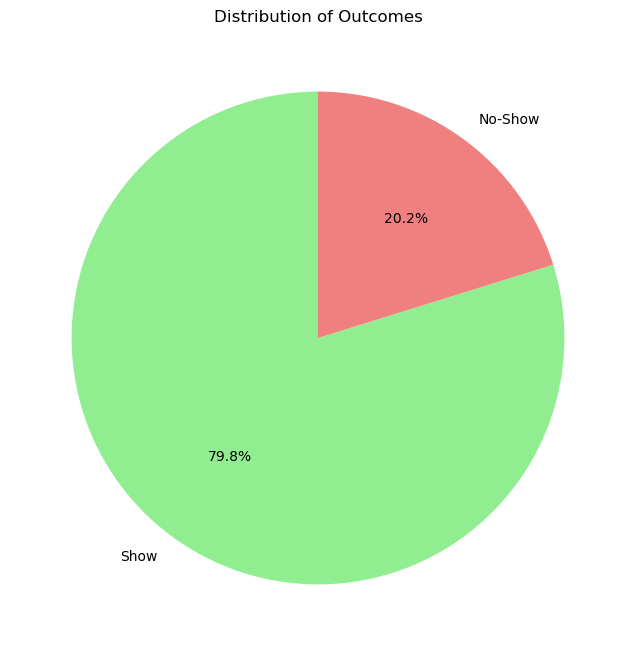

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(noshow_df['Outcome'].value_counts(), labels=['Show', 'No-Show'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Outcomes')
plt.show()

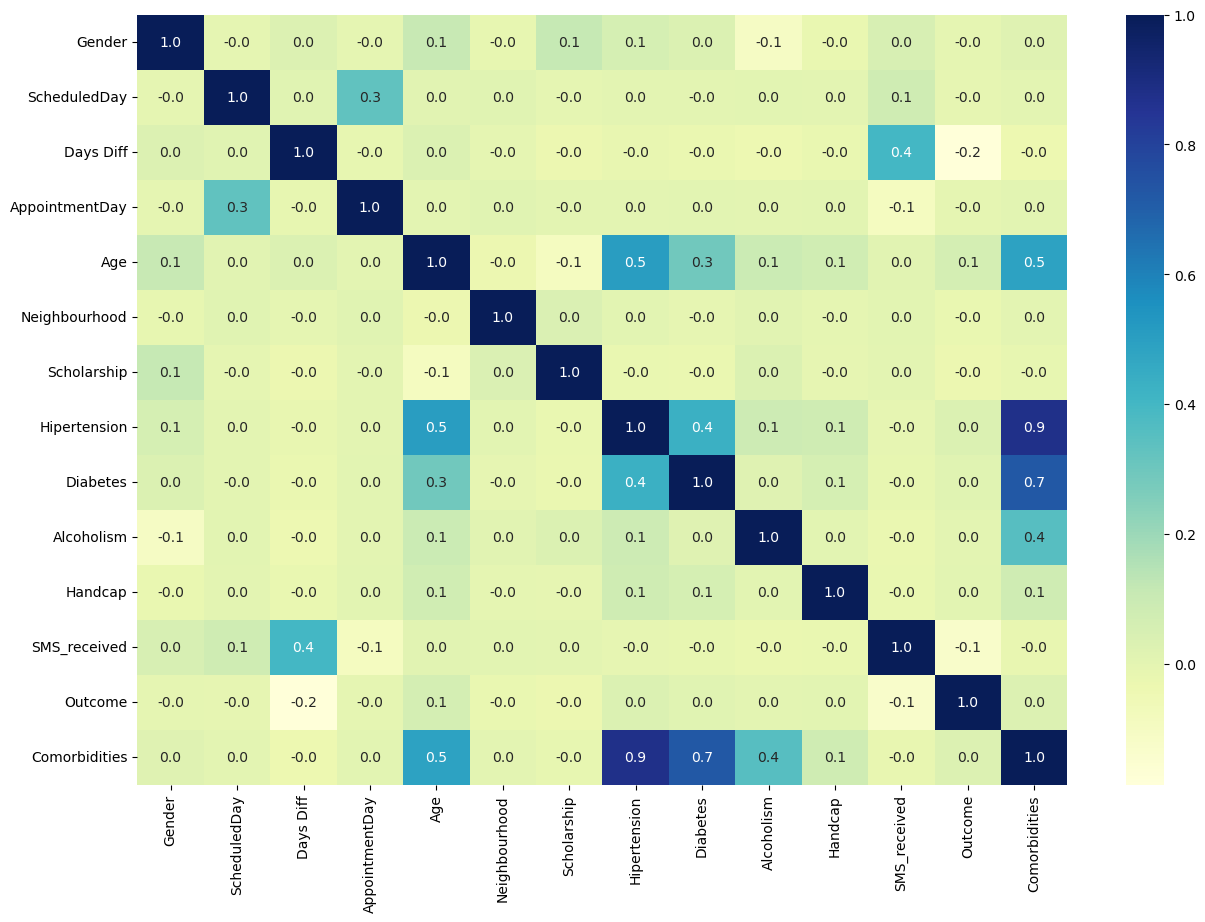

In [12]:
# Correlation heatmap
correlation_matrix = noshow_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='YlGnBu')
plt.show()

In [13]:
# Remove Neighborhood as it shows no correlation to any other parameter
#noshow_df = noshow_df.drop(columns=['Neighbourhood'])

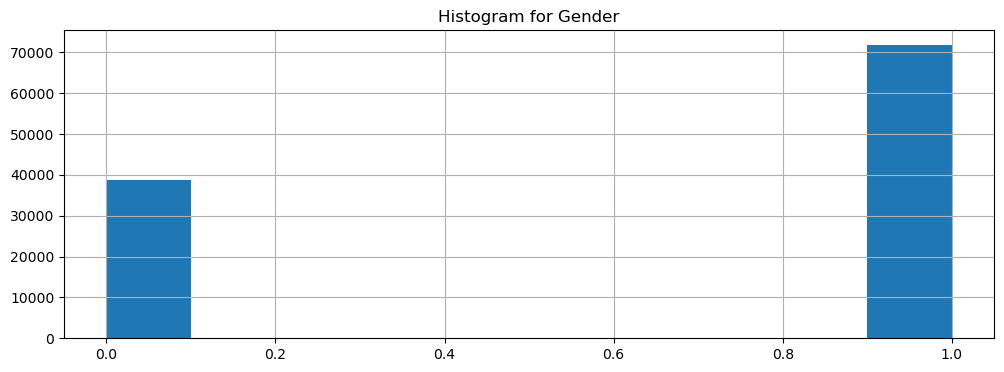

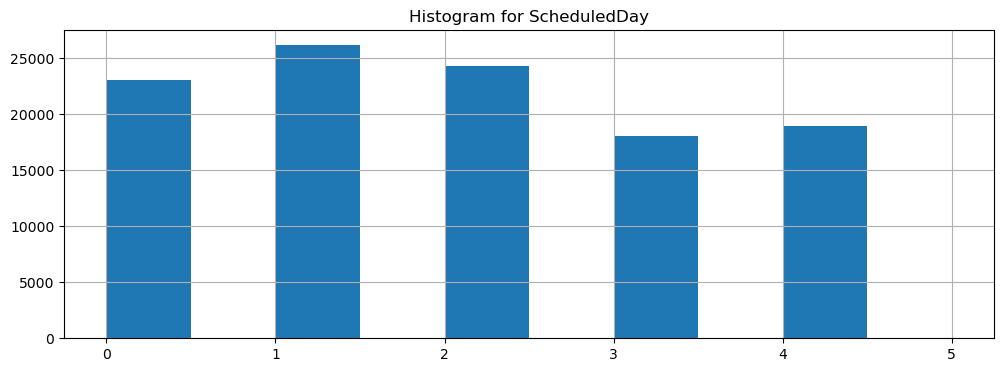

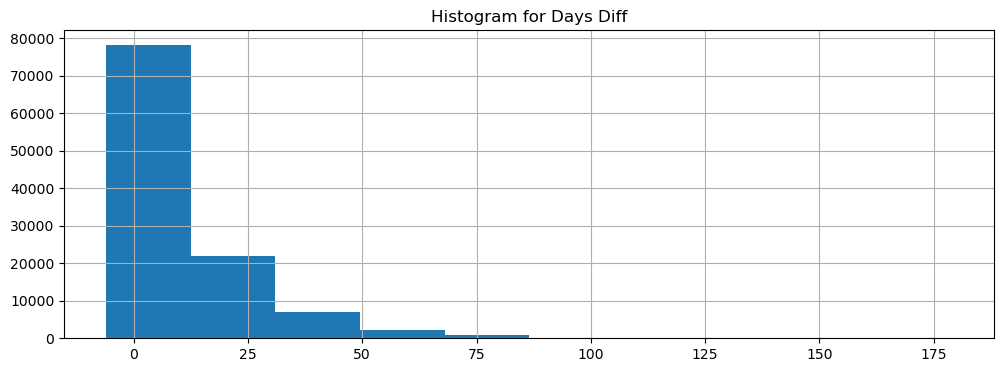

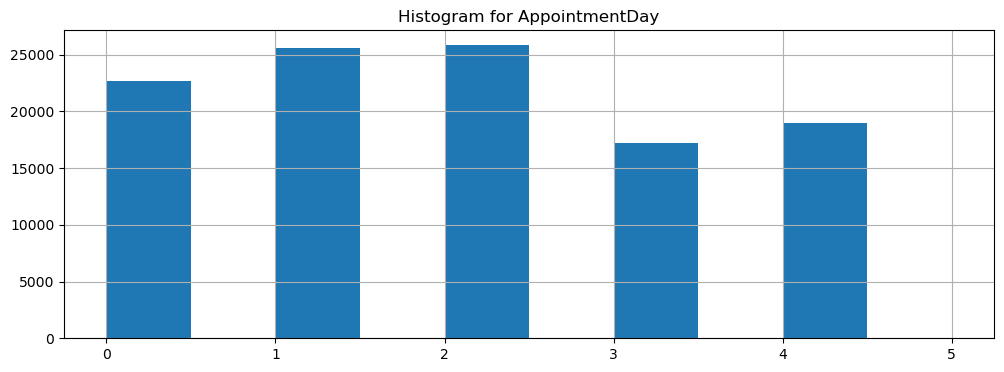

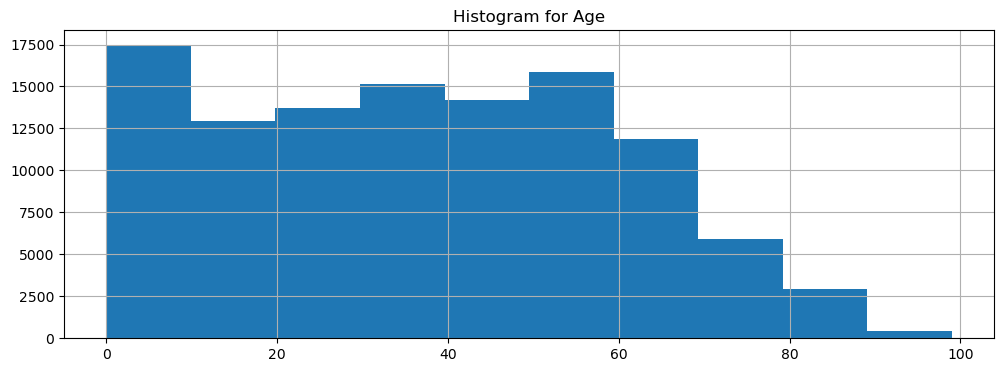

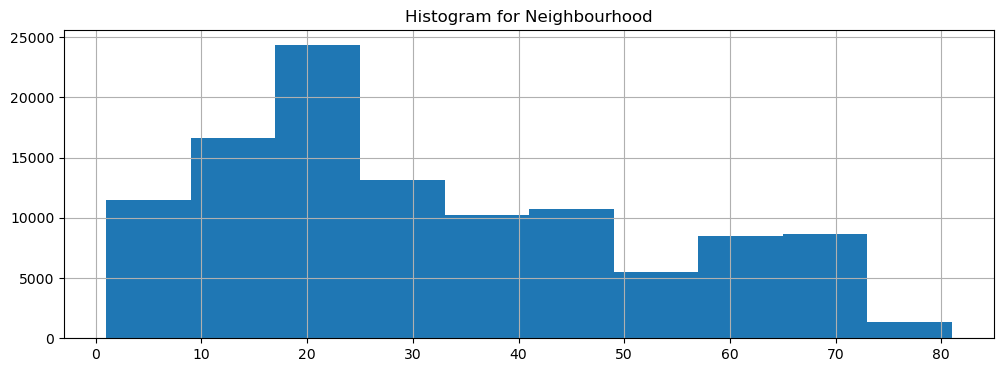

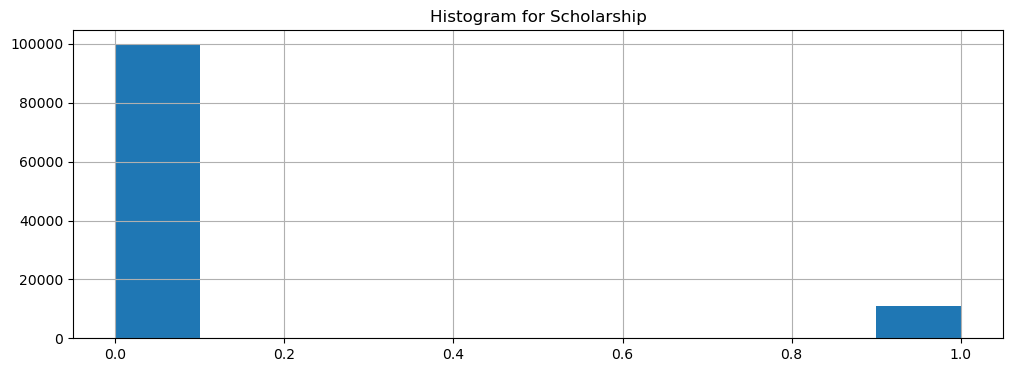

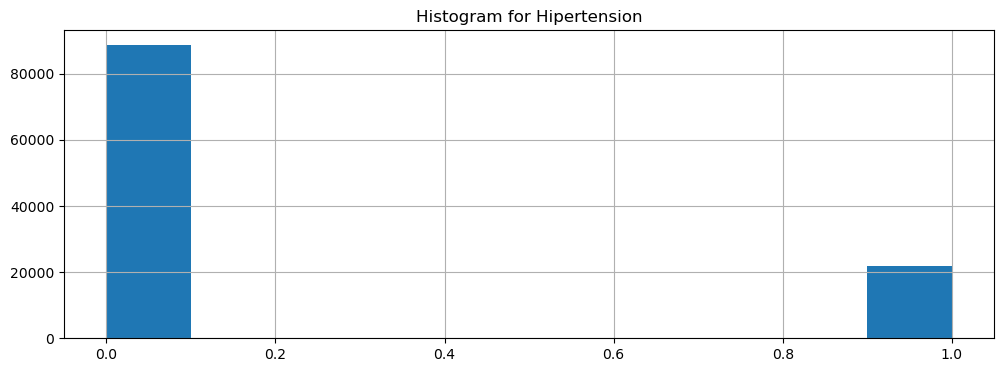

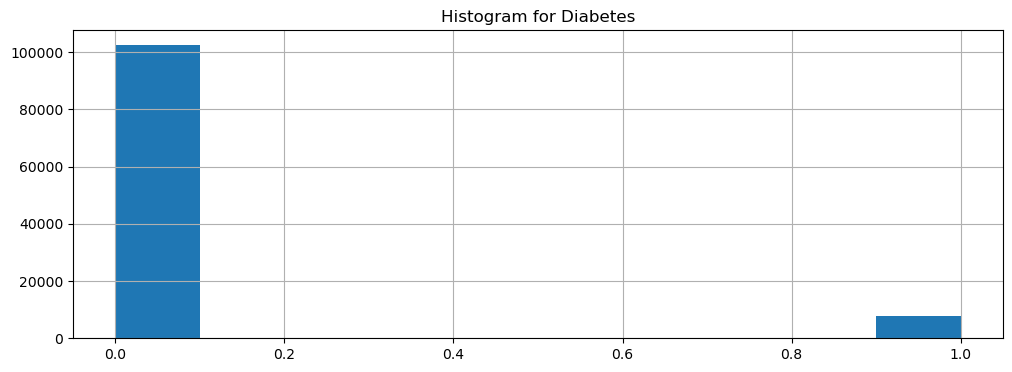

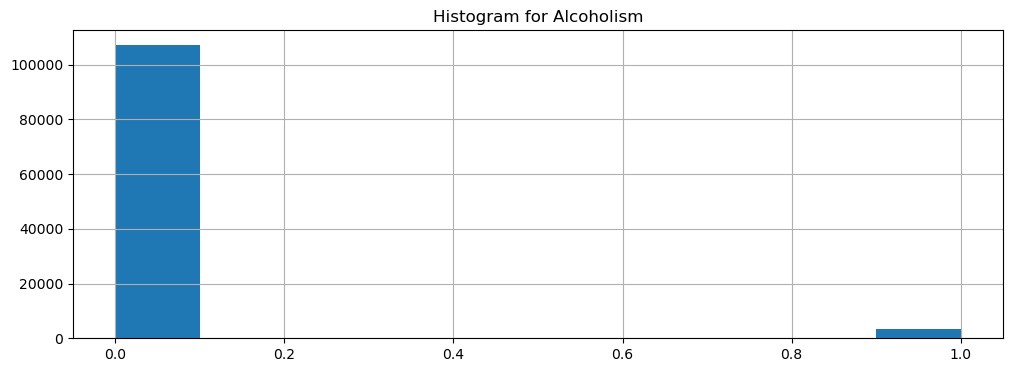

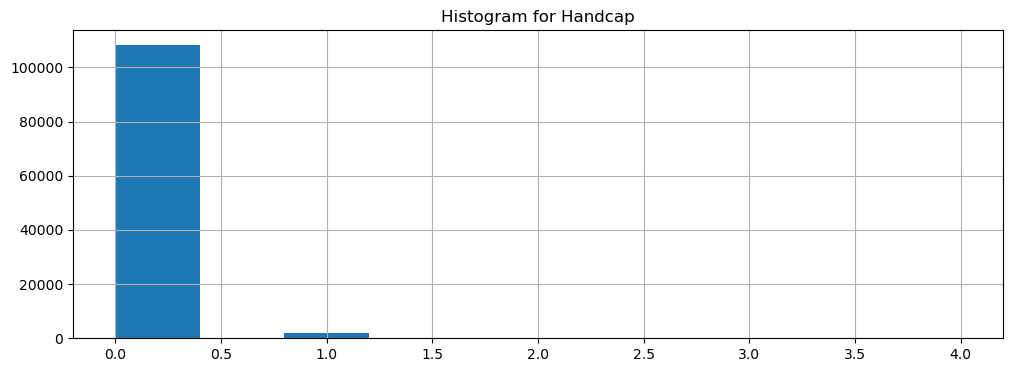

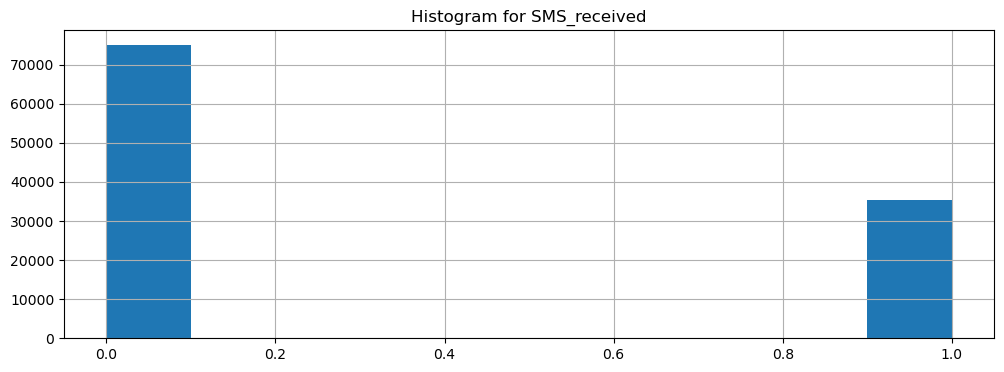

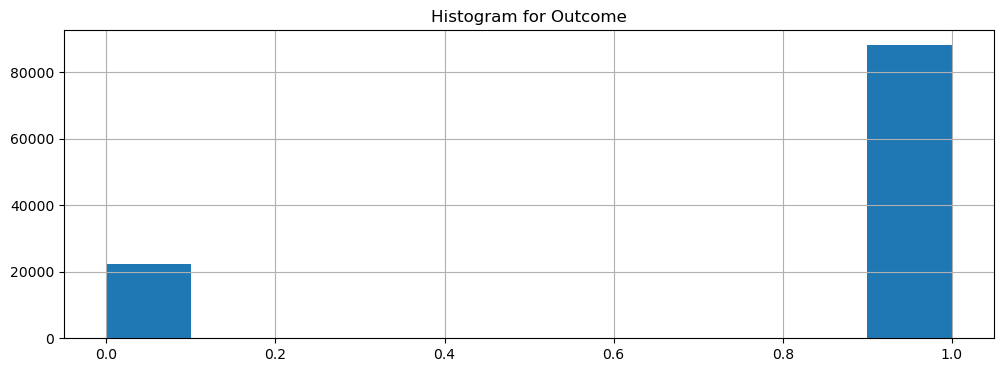

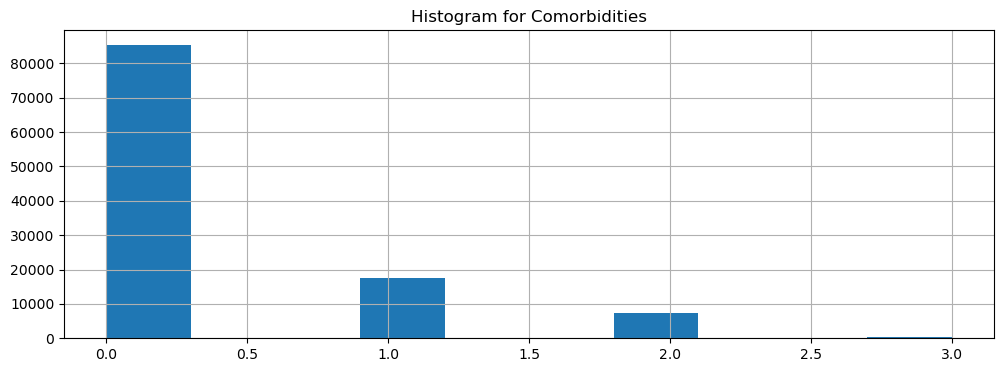

In [14]:

for column in noshow_df:
    plt.figure(figsize=(12, 4))
    noshow_df[column].hist()
    plt.title(f'Histogram for {column}')
    plt.show()

In [15]:
# Export csv
noshow_df.to_csv('../Data/appointment_clean2.csv', index=False)